<a href="https://colab.research.google.com/github/xumeiying/Stats-for-Political-Scientists/blob/main/introduction_to_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Programming in R
GOV Department Math Camp 

UT-Austin 08/18/2022

Meiying Xu

Programming is the art of asking your computer to do favors for you using language that computers understand. You do not need to be a computer scientist to be an excellent programmer; all of you can and will write high-quality code. The goal of this lecture is to introduce some basic programming concepts and terminology, and to give you a sense of what you can do with it.

## Objects

R is based around "objects."  Numbers, variables, graphs, etc...  All objects, as far as R is concerned. Usually, the programming tasks that we want to accomplish involve taking one or more objects as inputs, performing one or more functions on them, and "returning" one or more new objects.

Let's say we want to compute 2+2. R understands this as an operation in which we perform a function (addition) on two objects of class "numeric" (2 and 2) and return one object of class "numeric" (4). 


In [ ]:
2 + 2
class(2)
class(2+2)

[1] 4

[1] "numeric"

[1] "numeric"

R understands the + sign as a special operator that means we want to add together the numbers on either side of it. Most functions in R take a different form, however, which you saw above with the `class()` function. Functions have names (such as "class") and "arguments," which specify the types of objects that can be "passed" to the function and what happens to them. Arguments are entered inside the parentheses, and separated by commas. 

 Here's another way to add 2 and 2:

In [ ]:
sum(2,2)

# If we wanted to know more about the sum() function:
?sum

# We can "assign" this value (4) to a named variable, and perform operations using the named object instead.
four <- sum(2,2)
class(four)
sum(four, four)

# It might seem pointless to name such a basic value - it's easier to type 4 than "four." 
# But it makes life easier when working with longer expressions, for example:
my_val <- sqrt(35^3/5) + 12^2 * 20


[1] 4

[1] "numeric"

[1] "numeric"

[1] 4

[1] "numeric"

[1] 8

## Texts

In addition to "numeric", R recognizes many other object classes.

R knows how to work with text:

In [ ]:
my_text <- "I love math camp, and there's nowhere else I'd rather be right now."
class(my_text)
cat(my_text)
cat(my_text, "Seriously!")

[1] "character"

I love math camp, and there's nowhere else I'd rather be right now.I love math camp, and there's nowhere else I'd rather be right now. Seriously!

And Boolean logic, e.g. `TRUE` and `FALSE`. These are more useful for programming than you might think, because R uses them to evaluate whether or not certain conditions are met. Logical statements are also a good way to learn about how R "thinks."

In [ ]:
class(TRUE)
class(FALSE)

2 == 2
4 != 2
2 == "2"
2 == "2.0"
T == 1

[1] "logical"

[1] "logical"

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

## Vectors
The real power of R becomes apparent once we start using vectors, which are one-dimensional sets of objects that share the same class. We can create vectors in R using the `c() `function (short for "concatenate"), and importantly we can perform functions on all of the objects in the vector at once.

In [ ]:
numbers <- c(180, 230, 456, 100, 8)
class(numbers)
length(numbers)

[1] "numeric"

[1] 5

In [ ]:
# We can perform functions on vectors that return a single value:
sum(numbers)
mean(numbers)

[1] 974

[1] 194.8

In [ ]:
# And those that return a vector of the same length:
sqrt(numbers)
numbers - 2

[1] 13.416408 15.165751 21.354157 10.000000  2.828427

[1] 178 228 454  98   6

In [ ]:
# And those that return a vector of a different length:
rep(numbers, times = 2)
numbers[1:3]

[1] 180 230 456 100   8 180 230 456 100   8

[1] 180 230 456

We can even write our own function, if we want to do something specific with our vectors. Let's say we want to write a function that takes a numeric vector, raises each element to the nth power, then takes the sum of all elements and prints it out alongside a smiley face:


In [ ]:
weird_function <- function(vector, power) {
  step1 <- vector^power
  step2 <- sum(step1)
  cat(step2, ":~)")
}

test_vec <- c(1,2,3)

weird_function(test_vec, 2)

14 :~)

[1] 4.146264

4.146264

We can apply multiple functions to the same object(s), too. There are two main approaches to doing this. The traditional way is called nesting. Let's say we wanted to take the square root of each element in a vector, and then sum the resulting values:


In [ ]:
sum(sqrt(test_vec))

[1] 4.146264

Nested functions can seem counterintuitive, as our instinct is
to read the function names from left to right to figure out the order of operations. But that's wrong: R begins by evaluating the function that is "nested" in another function (in this case, `sqrt()`) and then evaluates the outside function (`sum()`) on the object that is output by the inside function. To make nested functions easier for others to read, some programmers use whitespace creatively:



In [ ]:
cat(
  sum(
    sqrt(test_vec)
  )
)

4.146264

## Functions
The second, "new-school" way to perform multiple functions on the same input object is called piping. To do this, we'll need to install a package called "`magrittr`". Part of the beauty of R is that it's an open-source software: anybody can develop a package - which contains custom functions - for others to use.You can install packages easily using the `install.packages()`

In [ ]:
install.packages("magrittr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Once you've installed a package once, you don't need to install it again (until you want to update it to a newer version). However, you will need to load it every time you begin a new R session:


In [ ]:
library(magrittr)

Now we have access to the pipe operator, `%>%`. The pipe operator takes the object to the left of it and inserts it into the first argument of the function to the right of it. The magrittr package comes with a shortcut for using the `pipe`: shift-command-m (or shift-control-m on a pc). Here's a basic example:

In [ ]:
test_vec %>% sum()
test_vec %>% sum() == sum(test_vec)

[1] 6

[1] TRUE

This is very useful for performing multiple functions on the same input object, in a way that is easy to read. Let's repeat the earlier example with `sqrt()`, `sum()`, and `cat()`, but now using pipes instead:

In [ ]:
test_vec %>% 
  sqrt() %>% 
  sum() %>% 
  cat()

4.146264


The advantage here is that the code is quite intuitive: begin with the input object (`test vec`), then perform the `sqrt()` function on it, then perform the `sum()` function on that, and then perform `the cat()` function on that. The pipe was designed to work with other functions in the `'tidyverse'` family of packages (dplyr, tidyr, ggplot2, and others; read more here: https://www.tidyverse.org/). One disadvantage is that you can only pipe output into the first argument of a function.

# Data Frame
Let's look at one of the most important object classes for social science research: the data.frame. We'll use the `data()` function to load one of R's built-in datasets.

In [ ]:
data(mtcars)
View(mtcars)
class(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


[1] "data.frame"

Note that `data.frames` are actually composed of column vectors of equal length, which we refer to as "variables." We can use another special operator (`$`) in order to select one of the variables from a dataset and see this more clearly:

In [ ]:
mtcars$mpg
class(mtcars$mpg)
mtcars$mpg^2
weird_function(mtcars$mpg, 2)

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

[1] "numeric"

[1]  441.00  441.00  519.84  457.96  349.69  327.61  204.49  595.36  519.84
[10]  368.64  316.84  268.96  299.29  231.04  108.16  108.16  216.09 1049.76
[19]  924.16 1149.21  462.25  240.25  231.04  176.89  368.64  745.29  676.00
[28]  924.16  249.64  388.09  225.00  457.96

14042.31 :~)

 We can also use the `$` operator to add new variables to a dataset:

In [ ]:
mtcars$mpg_squared <- mtcars$mpg^2
mtcars$is_it_a_car <- "Yes, it's a car."
View(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_squared,is_it_a_car
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,441.00,"Yes, it's a car."
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,441.00,"Yes, it's a car."
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,519.84,"Yes, it's a car."
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,457.96,"Yes, it's a car."
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,349.69,"Yes, it's a car."
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,327.61,"Yes, it's a car."
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,204.49,"Yes, it's a car."
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,595.36,"Yes, it's a car."
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,519.84,"Yes, it's a car."


The first step you should take whenever you're working with a new dataset is to look at the data. The `View()` function is a good start, but there's more we can do:

In [ ]:
summary(mtcars)
#install.packages("skimr")
library(skimr)
skimr_summary <- skim(mtcars)
View(skimr_summary)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb        mpg_squared    
 Min.   :0.0000 

── Data Summary ────────────────────────
                           Values
Name                       mtcars
Number of rows             32    
Number of columns          13    
_______________________          
Column type frequency:           
  character                1     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 is_it_a_car           0             1  16  16     0        1          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd     p0    p25    p50
 1 mpg                   0             1  20.1     6.03   10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79    4      4      6   
 3 disp                  0             1 231.    124.     71.1  121.   19

## ggplot

Maybe we're curious about the relationship between fuel efficiency (`mpg`) and horsepower (`hp`). Let's plot it - but first we'll install `ggplot2`, widely considered to be the best data visualization package in R.

In [ ]:
#install.packages("ggplot2")
library(ggplot2)
# The key function from the ggplot2 package is ggplot(). Let's look at the documentation:

?ggplot

Warning message in fetch(key):
“internal error -3 in R_decompress1”
ERROR while rich displaying an object: Error in fetch(key): lazy-load database '/usr/local/lib/R/site-library/ggplot2/help/ggplot2.rdb' is corrupt

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr),

We see that the first argument should be the data.frame that our variables will come from. The second argument is a function itself: the `aes()` function, in which we will define our x and y variables.

 Let's try:

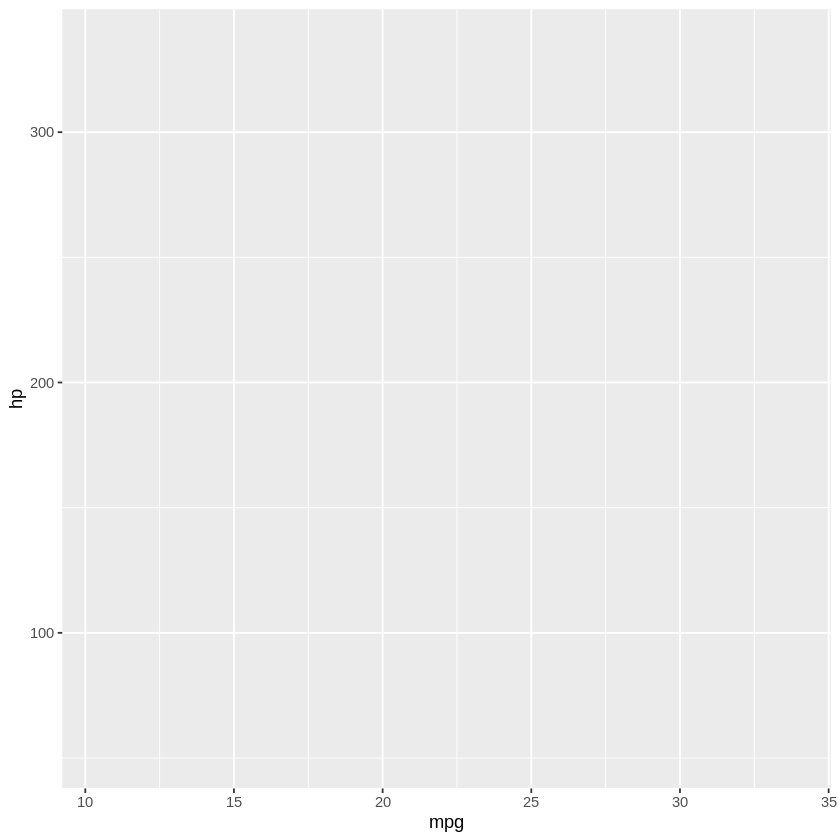

In [ ]:
ggplot(mtcars, aes(x = mpg, y = hp))

It's a plot, but there's nothing in it! That's because we haven't added a "geom" layer to the plot, which is how ggplot knows the type of plot that we want. We add layers with the `+` operator. In this case, we want a scatterplot, so let's use geom_point():

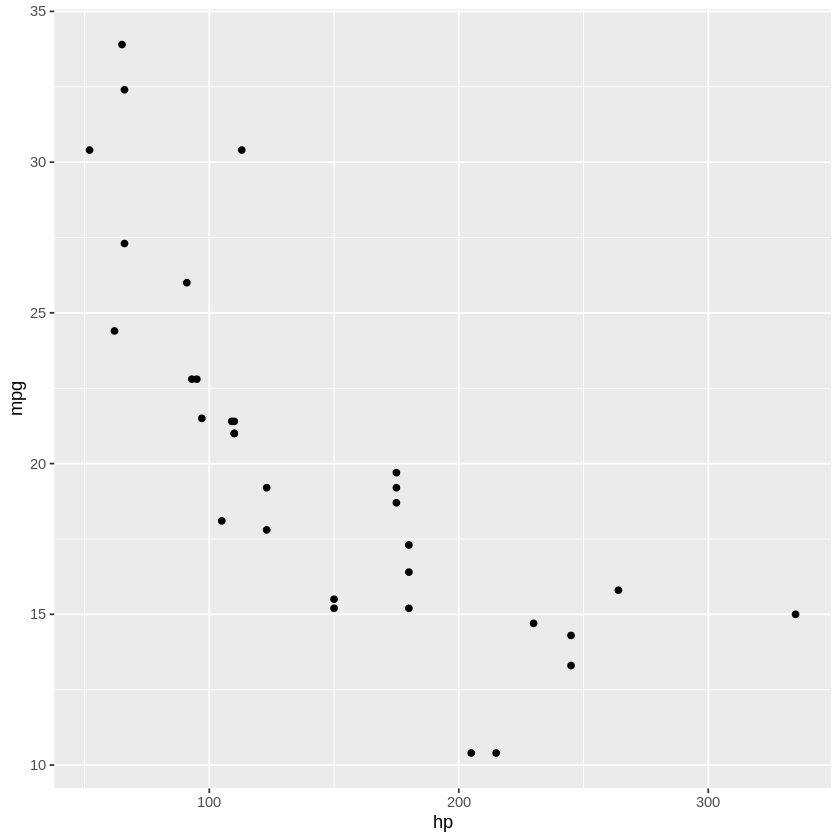

In [ ]:
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point()

Yep, sure looks like a negative relationship! That explains why my Honda Civic is so damn slow. Maybe we want to add a trend line, which we can easily do by adding another layer:


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



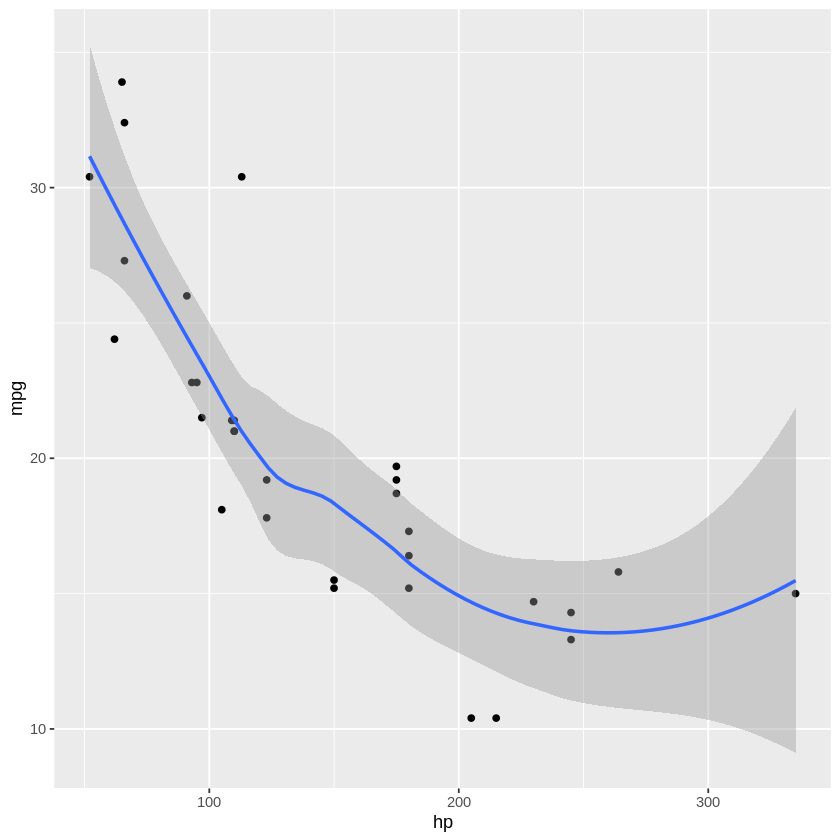

In [ ]:
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point() +
  geom_smooth()

Nice. Additional layers allow us to change the axis labels and the "theme."

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



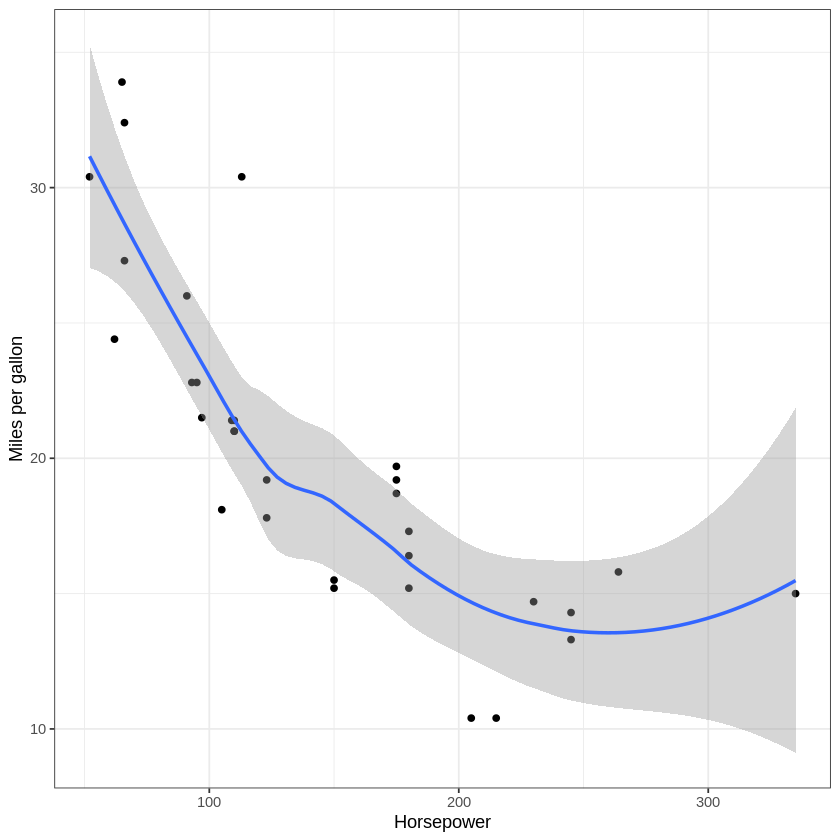

In [ ]:
ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point() +
  geom_smooth() +
  labs(x = "Horsepower", y = "Miles per gallon") +
  theme_bw()

We won't dive too deep into analysis here - you'll get to that later. But if we wanted to conduct a simple bivariate regression, we could do that using the `lm()` function (short for 'linear model').

In [ ]:
reg_model <- lm(mpg ~ hp, data = mtcars)

summary(reg_model)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


# Web-scraping with R

R is a flexible and powerful language, and there's a lot that you can do with it. I strongly suggest that you invest some time in learning programming skills, particularly during your first few years of the program: this will pay dividends when you are working on larger research projects. Here are a few brief examples of things I've  done with R recently:

Web-scraping: the below code generates URLs for different pages on the OECD's website, writes a scraping function that extracts all useful  information from each page, runs the function on each of the URLs, and combines the results into one data.frame.

In [ ]:
library(tidyverse)
library(rvest)
library(purrr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [ ]:
# Here's the function that makes the URLs:

get_urls <- function(country, n_instances) {
  
  first_9 <- tibble(urls = paste0("http://mneguidelines.oecd.org/database/instances/",
                                  country,
                                  "000",
                                  as.character(1:9),
                                  ".htm"))
  
  next_set <- tibble(urls = paste0("http://mneguidelines.oecd.org/database/instances/",
                                   country,
                                   "00",
                                   as.character(10:n_instances),
                                   ".htm"))
  
  return(bind_rows(first_9, next_set))
  
}

# Now I'll use this function to create the 48 URLs that are 
# associated with the US.

us_urls <- get_urls(country = "us", n_instances = 48)

# Here's the scraping function. Note the use of pipes:

scrape_table <- function(url) {
  
  read_html(url) %>% # read html web page
    
    html_node('table') %>% # extract node with class "table"
    
    html_table(header = F) %>% # coerce html table to dataframe
    
    pivot_wider(names_from = X1, values_from = X2) %>% # switch columns and rows
    
    rename(incident_title = 1)  %>% # rename first variable
    
    mutate(incident_url = url) # add url as a variable
}

# Here's an example of what it does:

scrape_table(us_urls$urls[1]) %>% 
  View()



incident_title,Lead NCP,Supporting NCP(s),Description,Theme(s),Date,Host country(ies),Source,Industry sector,Status,Summary,incident_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chemical manufacturing in the USA,United States,France,Specific instance notified by a trade union regarding the activities of a US subsidiary of a French multinational enterprises operating in the USA.,Employment and industrial relations,12 Jun 2000,United States,Trade Union,Manufacturing,Concluded,"In June 2000, the US NCP received a request for review from a trade union alleging that a US subsidiary of a French multinational enterprise had breached the employment and industrial relations provisions of the Guidelines. The trade union withdrew its request for NCP intervention after the parties settled their differences through a collective bargaining agreement.",http://mneguidelines.oecd.org/database/instances/us0001.htm


We want to do this for every url in the us_urls vector. We'll use the `map_dfr()` function from the purrr package, which applies a  function to each element in a vector and creates a data.frame from the output. This will take a second to run.

In [ ]:
scraped_data <- map_dfr(us_urls$urls, scrape_table)

# View(scraped_data)
head(scraped_data, 2)
# In less than 50 lines of code, we've just created a new dataset by scraping webpages.

incident_title,Lead NCP,Supporting NCP(s),Description,Theme(s),Date,Host country(ies),Source,Industry sector,Status,Summary,incident_url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Chemical manufacturing in the USA,United States,France,Specific instance notified by a trade union regarding the activities of a US subsidiary of a French multinational enterprises operating in the USA.,Employment and industrial relations,12 Jun 2000,United States,Trade Union,Manufacturing,Concluded,"In June 2000, the US NCP received a request for review from a trade union alleging that a US subsidiary of a French multinational enterprise had breached the employment and industrial relations provisions of the Guidelines. The trade union withdrew its request for NCP intervention after the parties settled their differences through a collective bargaining agreement.",http://mneguidelines.oecd.org/database/instances/us0001.htm
Employment issues in the maritime sector,United States,None Selected,Specific instance notified by a trade union regarding the activities of US multinational enterprise operating in the USA.,Employment and industrial relations,2 Feb 2001,United States,Trade Union,Transportation and storage,Not accepted,"In February 2001, the US NCP received a request for a review from a trade union alleging that a US multinational enterprise was breaching the employment and industrial relations provisions of the Guidelines in the maritime sector. After lengthy consultations with the US National Labor Relations Board (NLRB) and the parties, the NCP concluded that its further involvement was not warranted. A large factor in this decision was the NLRB's availability to consider the matter on the basis of US labour law.",http://mneguidelines.oecd.org/database/instances/us0002.htm


# Visualization with R

You can also do a lot of tweaking to make some really cool figures. Here a couple examples:

In [ ]:
# example 1

fig2 <- read_csv("JT2_fig2_data.csv") %>% 
  group_by(state) %>% 
  summarize(abatement = mean(abatement2017, na.rm = T)) %>% 
  mutate(nonGAAP = case_when(
    state %in% c("Alabama","Alaska","Idaho","Illinois",
                 "Indiana","Kansas","Michigan","Missouri",
                 "New York","North Dakota","Oklahoma",
                 "Washington","West Virginia") == T ~ 1,
    TRUE ~ 0
  )) %>% 
  ggplot(aes(x = fct_reorder(state, abatement), y = abatement*100,
             color = as.factor(nonGAAP))) +
  geom_point() +
  coord_flip() +
  theme_bw() +
  theme(legend.position = "bottom") +
  labs(y = "% of Municipalities Reporting Incentives",
       x = "",
       color = "Non-GAAP State")

fig2

In [ ]:
# example 2

figurex <- read_csv("diffusion_data.csv") %>% 
  slice(-1:-19) %>% 
  filter(Country %in% c("United States", "Japan", "China", "United Kingdom",
                        "France", "South Korea", "Hong Kong", "India",
                        "Canada", "Germany", "Switzerland", "Taiwan")) %>% 
  group_by(Country, Year) %>% 
  summarize(members = sum(ungc_member),
            prop_members = sum(ungc_member)/n()) %>% 
ggplot(aes(x = Year, y = prop_members, group = Country,
           label = Country)) +
  geom_line() +
  facet_wrap(vars(Country)) +
  labs(x = "", y = "Proportion UNGC Members") +
  theme_bw()

figurex